<a href="https://colab.research.google.com/github/Hemanth9336/Analyzing-Feature-Selection-Techniques-for-Machine-Learning-Based-Anomaly-Detection-in-IOT-System.-/blob/main/Genetic_Algorithm_KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn

In [ ]:
pip install sklearn-genetic

     |████████████████████████████████| 160 kB 13.9 MB/s 


In [ ]:
pip install sklearn-genetic-opt

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/KDDTrain+_20Percent.txt')

In [ ]:
##  adding column names to data frame

columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

#It gives an overview about a Dataframe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25191 entries, 0 to 25190
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25191 non-null  int64  
 1   protocol_type                25191 non-null  object 
 2   service                      25191 non-null  object 
 3   flag                         25191 non-null  object 
 4   src_bytes                    25191 non-null  int64  
 5   dst_bytes                    25191 non-null  int64  
 6   land                         25191 non-null  int64  
 7   wrong_fragment               25191 non-null  int64  
 8   urgent                       25191 non-null  int64  
 9   hot                          25191 non-null  int64  
 10  num_failed_logins            25191 non-null  int64  
 11  logged_in                    25191 non-null  int64  
 12  num_compromised              25191 non-null  int64  
 13  root_shell      

In [ ]:
#By default the head function returns the first 5 rows
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
#By default the tail function returns the first 5 rows
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
25186,0,tcp,exec,RSTO,0,0,0,0,0,0,...,0.03,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,19
25187,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.00,0.00,1.00,0.18,0.0,0.0,0.0,0.0,warezclient,12
25188,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.0,0.0,1.0,1.0,neptune,21
25189,0,tcp,nnsp,S0,0,0,0,0,0,0,...,0.08,0.06,0.00,0.00,1.0,1.0,0.0,0.0,neptune,20
25190,0,tcp,finger,S0,0,0,0,0,0,0,...,0.19,0.03,0.01,0.00,1.0,1.0,0.0,0.0,neptune,18


In [ ]:
#Count the number of rows and column in the data set
df.shape

(25191, 43)

In [ ]:
#Explore the data
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')

In [ ]:
df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

protocol_type_encoder = LabelEncoder()
df['protocol_type']=protocol_type_encoder.fit_transform(df['protocol_type'].astype(str))

service_encoder = LabelEncoder()
df['service']=service_encoder.fit_transform(df['service'].astype(str))

flag_encoder = LabelEncoder()
df['flag']=flag_encoder.fit_transform(df['flag'].astype(str))

attack_encoder = LabelEncoder()
df['attack']=attack_encoder.fit_transform(df['attack'].astype(str))

label=df['attack']

In [ ]:
#splitting the model into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                    label, test_size=0.30, 
                                                    random_state=101)

In [ ]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9997353797300873


In [ ]:
#training a logistics regression model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print("Accuracy = "+ str(accuracy_score(y_test,predictions)))

Accuracy = 0.8641174913998412


In [ ]:
#defining various steps required for the genetic algorithm
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],y_train)
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

##Print the selected features

In [ ]:
from sklearn.svm import LinearSVC
from __future__ import print_function
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, linear_model

from genetic_selection import GeneticSelectionCV


def main():
    df = pd.read_csv('/content/KDDTrain+_20Percent.txt')
    
    df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
    
    ##  adding column names to data frame

    columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins'
    ,'logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds'
    ,'is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate'
    ,'diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate'
    ,'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
    ,'attack','level'])

    df.columns = columns
    
    protocol_type_encoder = LabelEncoder()
    df['protocol_type']=protocol_type_encoder.fit_transform(df['protocol_type'].astype(str))

    service_encoder = LabelEncoder()
    df['service']=service_encoder.fit_transform(df['service'].astype(str))

    flag_encoder = LabelEncoder()
    df['flag']=flag_encoder.fit_transform(df['flag'].astype(str))

    attack_encoder = LabelEncoder()
    df['attack']=attack_encoder.fit_transform(df['attack'].astype(str))


    X = df
    y = df['attack']

    estimators = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")

    selectors = GeneticSelectionCV(estimators,
                                  cv=6,
                                  verbose=2,
                                  scoring="accuracy",
                                  max_features=10,
                                  n_population=60,
                                  crossover_proba=0.6,
                                  mutation_proba=0.05,
                                  n_generations=15,
                                  crossover_independent_proba=0.6,
                                  mutation_independent_proba=0.05,
                                  tournament_size=4,
                                  n_gen_no_change=20,
                                  caching=True,
                                  n_jobs=-2)
    selectors = selectors.fit(X, y)

    print(selectors.support_)


if __name__ == "__main__":
    main()

Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                               
0  	60    	[ 0.787703  5.683333  0.00862 ]	[ 0.12829   3.196309  0.024058]	[ 0.517208  1.        0.000081]	[  0.949466  10.         0.134982]
1  	38    	[-832.522646    7.716667  833.336318]	[ 2764.098424     2.608267  2763.853092]	[-10000.            2.            0.000103]	[     0.949466     13.        10000.      ]
2  	46    	[-1499.219947     8.066667  1500.0028  ]	[ 3571.041902     2.242518  3570.713038]	[-10000.            3.            0.001106]	[     0.957882     13.        10000.      ]
3  	32    	[-499.10737     8.133333  500.002445]   	[ 2179.654255     1.677962  2179.448911]	[-10000.            5.            0.001361]	[     0.957882     11.        10000.      ]
4  	36    	[-165.729093    8.616667  166.668888]   	[ 1280.31302      1.198494  1280.190669]	[-10000.            6.            0.0013

In [ ]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Load the data
data = pd.read_csv('/content/KDDTrain+_20Percent.txt')

data = data.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins'
,'logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds'
,'is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate'
,'diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
,'attack','level'])

data.columns = columns
    
protocol_type_encoder = LabelEncoder()
data['protocol_type']=protocol_type_encoder.fit_transform(data['protocol_type'].astype(str))

service_encoder = LabelEncoder()
data['service']=service_encoder.fit_transform(data['service'].astype(str))

flag_encoder = LabelEncoder()
data['flag']=flag_encoder.fit_transform(data['flag'].astype(str))

attack_encoder = LabelEncoder()
data['attack']=attack_encoder.fit_transform(data['attack'].astype(str))

n_samples = len(data)
X = data
y = data['attack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

clf = RandomForestClassifier()

##data is fitted with the help of GASearchCV

In [ ]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30), 
              'max_leaf_nodes': Integer(2, 35), 
              'n_estimators': Integer(100, 300)}

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=15,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.6,
                               mutation_probability=0.05,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [ ]:
evolved_estimator.fit(X_train,y_train)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.886952	0.03248    	0.952627   	0.863438   
1  	14    	0.923541	0.0352381  	0.954215   	0.869657   
2  	12    	0.938454	0.0305511  	0.954215   	0.869657   
3  	14    	0.953646	0.000388286	0.954215   	0.953156   
4  	11    	0.953857	0.000360213	0.954215   	0.953421   
5  	11    	0.953804	0.000292621	0.954215   	0.953421   
6  	14    	0.95399 	0.000237084	0.954215   	0.953553   
7  	9     	0.954096	0.00018192 	0.954215   	0.953818   
8  	16    	0.953844	0.000453789	0.954215   	0.952759   
9  	14    	0.954228	0.000983952	0.956994   	0.953288   
10 	12    	0.954082	0.000144958	0.954215   	0.953818   
11 	13    	0.953791	0.000582242	0.954215   	0.952759   
12 	12    	0.953778	0.000458587	0.954215   	0.952891   
13 	13    	0.954294	0.000555776	0.955406   	0.953024   
14 	10    	0.954373	0.000442061	0.955406   	0.953553   
15 	14    	0.954625	0.000524158	0.955406   	0.954215   


GASearchCV(crossover_probability=0.6,
           cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
           estimator=RandomForestClassifier(max_depth=16, max_leaf_nodes=32,
                                            min_weight_fraction_leaf=0.016579443235020405,
                                            n_estimators=163),
           generations=15, keep_top_k=4, mutation_probability=0.05, n_jobs=-1,
           param_grid={'bootstrap': <sklearn_genetic.space.space.Catego...
                       'max_depth': <sklearn_genetic.space.space.Integer object at 0x7feb5e8ca550>,
                       'max_leaf_nodes': <sklearn_genetic.space.space.Integer object at 0x7feb5e85cc10>,
                       'min_weight_fraction_leaf': <sklearn_genetic.space.space.Continuous object at 0x7feb5e8b0550>,
                       'n_estimators': <sklearn_genetic.space.space.Integer object at 0x7feb5e85c8d0>},
           population_size=10, return_train_score=True, scoring='accuracy'

In [ ]:
y_predicy_ga = evolved_estimator.predict(X_test)
accuracy_score(y_test,y_predicy_ga)

0.95349892253601

In [ ]:
evolved_estimator.best_params_

{'bootstrap': True,
 'max_depth': 16,
 'max_leaf_nodes': 32,
 'min_weight_fraction_leaf': 0.016579443235020405,
 'n_estimators': 163}

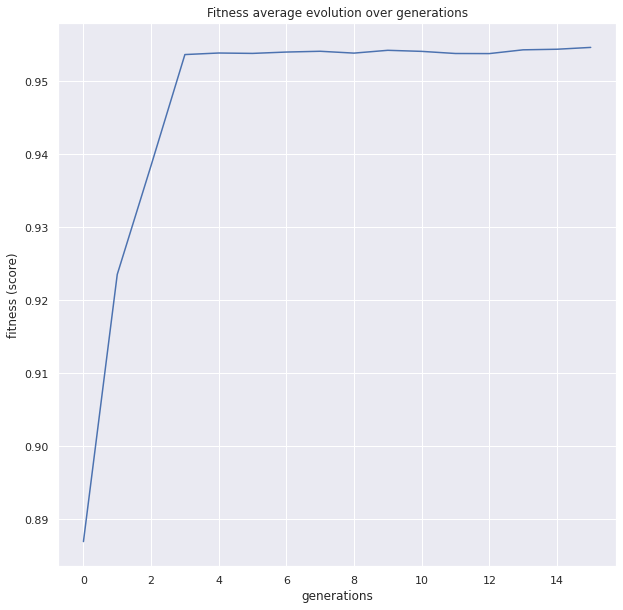

In [ ]:
plot_fitness_evolution(evolved_estimator)
plt.show()

In [ ]:
print(evolved_estimator.logbook)

                                                                                                                                                        parameters                                                                                                                                                        
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
bootstrap	cv_scores                         	fit_time                          	index	max_depth	max_leaf_nodes	min_weight_fraction_leaf	n_estimators	score   	score_time                        	test_score                        	train_score                       
True     	[0.86383486 0.86383486 0.86383486]	[0.55527639 0.55757356 0.42369246]	0    	16       	3          

In [ ]:
evolved_estimator.hof

{0: {'bootstrap': True,
  'max_depth': 16,
  'max_leaf_nodes': 32,
  'min_weight_fraction_leaf': 0.016579443235020405,
  'n_estimators': 163},
 1: {'bootstrap': True,
  'max_depth': 16,
  'max_leaf_nodes': 32,
  'min_weight_fraction_leaf': 0.019245437578258293,
  'n_estimators': 216},
 2: {'bootstrap': True,
  'max_depth': 16,
  'max_leaf_nodes': 32,
  'min_weight_fraction_leaf': 0.019245437578258293,
  'n_estimators': 163},
 3: {'bootstrap': True,
  'max_depth': 16,
  'max_leaf_nodes': 29,
  'min_weight_fraction_leaf': 0.019245437578258293,
  'n_estimators': 163}}

In [ ]:
chromo,score=generations(size=20,n_feat=43,n_parents=10,mutation_rate=0.10,
                     n_gen=15,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
clf.fit(X_train.iloc[:,chromo[-1]],y_train)
predictions = clf.predict(X_test.iloc[:,chromo[-1]])
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,predictions)))

[0.8517069297947147, 0.8501190881252126]
[0.9026879891119428, 0.9026879891119428]
[0.9104003629352387, 0.9104003629352387]
[0.8943518203470568, 0.8943518203470568]
[0.9522513326528298, 0.9522513326528298]
[0.9614381308835205, 0.9614381308835205]
[0.973857321084269, 0.973857321084269]
[0.9748780764432347, 0.9748780764432347]
[0.9772598389474878, 0.9772598389474878]
[0.9810026085970285, 0.9810026085970285]
[0.9318362254735171, 0.9318362254735171]
[0.909719859362595, 0.909719859362595]
[0.9489622320517183, 0.9489622320517183]
[0.9455597141884995, 0.9455597141884995]
[0.9426675740047635, 0.9426675740047635]
Accuracy score after genetic algorithm is= 0.9417602359079051


In [ ]:
chromo,score=generations(size=20,n_feat=43,n_parents=10,mutation_rate=0.10,
                     n_gen=15,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
logmodel.fit(X_train.iloc[:,chromo[-1]],y_train)
predictions = logmodel.predict(X_test.iloc[:,chromo[-1]])
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test,predictions)))

[0.8480775774072814, 0.8464897357377793]
[0.8592491777248498, 0.8592491777248498]
[0.86049676760803, 0.86049676760803]
[0.9275263695134399, 0.9275263695134399]
[0.9131790858568675, 0.9131790858568675]
[0.9132925031189747, 0.9132925031189747]
[0.8867528637858683, 0.8867528637858683]
[0.8990586367245095, 0.8990586367245095]
[0.9080753090620393, 0.9080753090620393]
[0.8912328456391063, 0.8912328456391063]
[0.9176590677101055, 0.9176590677101055]
[0.9208914596801633, 0.9208914596801633]
[0.9242372689123285, 0.9242372689123285]
[0.9388680957241692, 0.9388680957241692]
[0.9371668367925599, 0.9371668367925599]
Accuracy score after genetic algorithm is= 0.9358058296472723


##we can select the features with the help of the genetic selection function

In [ ]:
from genetic_selection import GeneticSelectionCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

df = pd.read_csv('/content/KDDTrain+_20Percent.txt')

df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins'
,'logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds'
,'is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate'
,'diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
,'attack','level'])

df.columns = columns
    
protocol_type_encoder = LabelEncoder()
df['protocol_type']=protocol_type_encoder.fit_transform(df['protocol_type'].astype(str))

service_encoder = LabelEncoder()
df['service']=service_encoder.fit_transform(df['service'].astype(str))

flag_encoder = LabelEncoder()
df['flag']=flag_encoder.fit_transform(df['flag'].astype(str))

attack_encoder = LabelEncoder()
df['attack']=attack_encoder.fit_transform(df['attack'].astype(str))

x = df.drop('attack',axis=1)
Y = df['attack']
estimators = DecisionTreeClassifier()
models = GeneticSelectionCV(
    estimators, cv=5, verbose=0,
    scoring="accuracy", max_features=10,
    n_population=100, crossover_proba=0.6,
    mutation_proba=0.05, n_generations=15,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
models = models.fit(x, Y)
print('Feature Selection:', x.columns[models.support_])

Feature Selection: Index(['service', 'flag', 'src_bytes', 'is_host_login', 'same_srv_rate',
       'diff_srv_rate', 'dst_host_count', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'level'],
      dtype='object')


In [ ]:
#split dataset in features and target variable
feature_cols = ['service', 'flag', 'src_bytes', 'is_host_login', 'same_srv_rate',
       'diff_srv_rate', 'dst_host_count', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'level']
x = df[feature_cols] # Features
Y = df['attack'] # Target variable

In [ ]:
# Split dataset into training set and test set
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9949722148716592
